#Programming Assignment2 A* Shortest Path Finding

In operation at SomeShoppingMall, a network of autonomous robots diligently manages the logistics of merchandise for store proprietors. A standard robotic task is comprised of the following steps:
<br>
<br>1 Initiating at the parking lot, the robot undertakes the task of loading goods.
<br>2 The robot then proceeds to transport the goods to the specific store in need and unload goods.
<br>3 Subsequently, the robot navigates to the destination store requiring delivery service and load goods.
<br>4 Finally, the robot returns to the parking lot and unload goods for shipment.
<br>
<br>Below are the map of the shopping mall and its description.

<table>
        <tr>
            <td>
            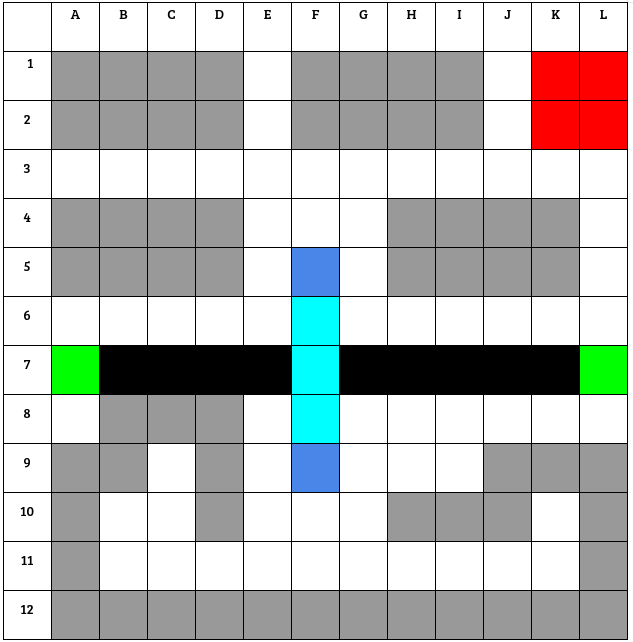
            </td>
            <td>
                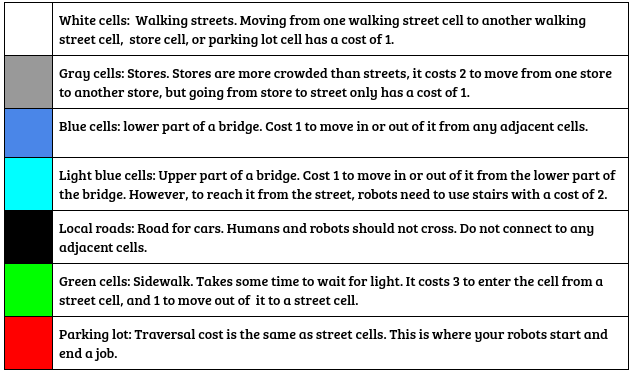
            </td>
        </tr>
    </table>



Turn the map above into a graph, and implement an A star search to help robots find the shortest path to destinations for their jobs.
<br>Robots can only move in 4 directions (up down left right).
<br>Cells indicating coordinates are not reachable (cells with A,B,...1,2,...).

##Requirements

0 You may make use of UCS and greedy code in class files.
<br>
<br>1 You need to turn above map into a weighted directed graph with heuristic.
<br>1.1 You may do it by hand or programmatically.
<br>1.2 You are required to print out your graph. Graph plot is not required but graph text is required.
<br>
<br>2 You are required to come up with a heuristic function.
<br>2.1 Your heuristic function does not have to be a math equation, it can be hand calculated for each node.
<br>2.2 You are required to provide reasons for your heuristic function.
<br>
<br>3 You need to provide sample run for tasks below:
<br>3.1 [start:K2, 1st_store:B9, 2nd_store:D9, end:K1]
<br>3.2 [start:K1, 1st_store:H1, 2nd_store:H1, end:L2] (1st store is the same as 2nd store)
<br>3.3 [start:L2, 1st_store:J5, 2nd_store:H10, end:K2]
<br>3.4 [start:L1, 1st_store:I1, 2nd_store:H5, end:K1]
<br>3.5 [start:K2, 1st_store:D9, 2nd_store:A4, end:L1]
<br>3.6 Your sample run needs to output path for each step.
<br>
<br>4 As for this assignment, I do not require your search to give the best path every time, but it must terminate every time.
<br>
<br>5 You are required to provide commented readable code.


##What to submit:

On canvas
1. Link to a github repo

<br>In github repo:
1. a py/ipynb file that meet all requirements
2. a readme file containing
  1. a link to a shared colab of your work that showcase your results. It can be the same file as in 1., but this file must be documented/commented.
  2. name of group members' official names

<br><b>All members need to submit!</b>


In [ ]:
mall = [["( 1,  1)","2","( 1,  2)","2","( 1,  3)","2","( 1,  4)","1","( 1,  5)","1","( 1,  6)","2","( 1,  7)","2","( 1,  8)","2","( 1,  9)","1","( 1, 10)","1","( 1, 11)","1","( 1, 12)"], ["2","","2","","2","","2","","1","","2","","2","","2","","2","","1","","1","","1"], ["( 2,  1)","2","( 2,  2)","2","( 2,  3)","2","( 2,  4)","1","( 2,  5)","1","( 2,  6)","2","( 2,  7)","2","( 2,  8)","2","( 2,  9)","1","( 2, 10)","1","( 2, 11)","1","( 2, 12)"], ["1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1"], ["( 3,  1)","1","( 3,  2)","1","( 3,  3)","1","( 3,  4)","1","( 3,  5)","1","( 3,  6)","1","( 3,  7)","1","( 3,  8)","1","( 3,  9)","1","( 3, 10)","1","( 3, 11)","1","( 3, 12)"], ["1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1"], ["( 4,  1)","2","( 4,  2)","2","( 4,  3)","2","( 4,  4)","1","( 4,  5)","1","( 4,  6)","1","( 4,  7)","1","( 4,  8)","2","( 4,  9)","2","( 4, 10)","2","( 4, 11)","1","( 4, 12)"], ["2","","2","","2","","2","","1","","1","","1","","2","","2","","2","","2","","1"], ["( 5,  1)","2","( 5,  2)","2","( 5,  3)","2","( 5,  4)","1","( 5,  5)","1","( 5,  6)","1","( 5,  7)","1","( 5,  8)","2","( 5,  9)","2","( 5, 10)","2","( 5, 11)","1","( 5, 12)"], ["1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1"], ["( 6,  1)","1","( 6,  2)","1","( 6,  3)","1","( 6,  4)","1","( 6,  5)","2/1","( 6,  6)","2/1","( 6,  7)","1","( 6,  8)","1","( 6,  9)","1","( 6, 10)","1","( 6, 11)","1","( 6, 12)"], ["3/1","","999","","999","","999","","999","","1","","999","","999","","999","","999","","999","","3/1"], ["( 7,  1)","999","( 7,  2)","","( 7,  3)","","( 7,  4)","","( 7,  5)","999","( 7,  6)","999","( 7,  7)","","( 7,  8)","","( 7,  9)","","( 7, 10)","","( 7, 11)","999","( 7, 12)"], ["3/1","","999","","999","","999","","999","","1","","999","","999","","999","","999","","999","","3/1"], ["( 8,  1)","1","( 8,  2)","2","( 8,  3)","2","( 8,  4)","1","( 8,  5)","2/1","( 8,  6)","2/1","( 8,  7)","1","( 8,  8)","1","( 8,  9)","1","( 8, 10)","1","( 8, 11)","1","( 8, 12)"], ["1","","2","","1","","2","","1","","1","","1","","1","","1","","1","","1","","1"], ["( 9,  1)","2","( 9,  2)","1","( 9,  3)","1","( 9,  4)","1","( 9,  5)","1","( 9,  6)","1","( 9,  7)","1","( 9,  8)","1","( 9,  9)","1","( 9, 10)","2","( 9, 11)","2","( 9, 12)"], ["2","","1","","1","","2","","1","","1","","1","","1","","1","","2","","1","","2"], ["(10,  1)","1","(10,  2)","1","(10,  3)","1","(10,  4)","1","(10,  5)","1","(10,  6)","1","(10,  7)","1","(10,  8)","2","(10,  9)","2","(10, 10)","1","(10, 11)","1","(10, 12)"], ["2","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","2"], ["(11,  1)","1","(11,  2)","1","(11,  3)","1","(11,  4)","1","(11,  5)","1","(11,  6)","1","(11,  7)","1","(11,  8)","1","(11,  9)","1","(11, 10)","1","(11, 11)","1","(11, 12)"], ["2","","1","","1","","1","","1","","1","","1","","1","","1","","1","","1","","2"], ["(12,  1)","2","(12,  2)","2","(12,  3)","2","(12,  4)","2","(12,  5)","2","(12,  6)","2","(12,  7)","2","(12,  8)","2","(12,  9)","2","(12, 10)","2","(12, 11)","2","(12, 12)"]]

def reorderArray(data, order):
	new_array = []
	for i in order:
		new_array.append(data[i])
	return new_array


for border in range(0, 23, 2):
	for edge in range(1, 22, 2):
		h_edge  = [mall[border][edge-1], mall[border][edge+1], mall[border][edge]]
		h_edge2 = [mall[border][edge+1], mall[border][edge-1], mall[border][edge]]
		v_edge  = [mall[edge-1][border], mall[edge+1][border], mall[edge][border]]
		v_edge2 = [mall[edge+1][border], mall[edge-1][border], mall[edge][border]]

		print(", ".join(h_edge ))
		print(", ".join(h_edge2))
		print(", ".join(v_edge ))
		print(", ".join(v_edge2))


( 1,  1), ( 1,  2), 2
( 1,  2), ( 1,  1), 2
( 1,  1), ( 2,  1), 2
( 2,  1), ( 1,  1), 2
( 1,  2), ( 1,  3), 2
( 1,  3), ( 1,  2), 2
( 2,  1), ( 3,  1), 1
( 3,  1), ( 2,  1), 1
( 1,  3), ( 1,  4), 2
( 1,  4), ( 1,  3), 2
( 3,  1), ( 4,  1), 1
( 4,  1), ( 3,  1), 1
( 1,  4), ( 1,  5), 1
( 1,  5), ( 1,  4), 1
( 4,  1), ( 5,  1), 2
( 5,  1), ( 4,  1), 2
( 1,  5), ( 1,  6), 1
( 1,  6), ( 1,  5), 1
( 5,  1), ( 6,  1), 1
( 6,  1), ( 5,  1), 1
( 1,  6), ( 1,  7), 2
( 1,  7), ( 1,  6), 2
( 6,  1), ( 7,  1), 3/1
( 7,  1), ( 6,  1), 3/1
( 1,  7), ( 1,  8), 2
( 1,  8), ( 1,  7), 2
( 7,  1), ( 8,  1), 3/1
( 8,  1), ( 7,  1), 3/1
( 1,  8), ( 1,  9), 2
( 1,  9), ( 1,  8), 2
( 8,  1), ( 9,  1), 1
( 9,  1), ( 8,  1), 1
( 1,  9), ( 1, 10), 1
( 1, 10), ( 1,  9), 1
( 9,  1), (10,  1), 2
(10,  1), ( 9,  1), 2
( 1, 10), ( 1, 11), 1
( 1, 11), ( 1, 10), 1
(10,  1), (11,  1), 2
(11,  1), (10,  1), 2
( 1, 11), ( 1, 12), 1
( 1, 12), ( 1, 11), 1
(11,  1), (12,  1), 2
(12,  1), (11,  1), 2
( 2,  1), ( 2,  2), 2
( 

In [ ]:
# @graph-class
import sys
import matplotlib.pyplot as plt
import networkx as nx


class WeightedGraph:
  def __init__(self):
    self.all_nodes = {}

  def addNode(self, name, adj_nodes_with_cost):   #node has form:
    node_content_dict = {}
    node_content_dict.update(adj_nodes_with_cost) #{"name":{"adj_node1":cost1, "adj_node2:cost2",......}}
    self.all_nodes[name] = node_content_dict

  def addSingleEdge(self, nodeFrom, nodeTo, weight):
    if (nodeFrom not in self.all_nodes):
      self.all_nodes[nodeFrom] = {}
    if (nodeTo not in self.all_nodes):
      self.all_nodes[nodeTo] = {}
    self.all_nodes[nodeFrom][nodeTo] = weight
    return self.all_nodes[nodeFrom]

  def printGraph(self):
    print(self.all_nodes)


  def plotWeightedGraph(self):
    G = nx.DiGraph()
    for curr_node in self.all_nodes:
      curr_node_str = curr_node
      for curr_adj_node in self.all_nodes[curr_node]:
        if curr_adj_node == 'h_val':
          continue
        adj_node_str = curr_adj_node
        edge_cost = self.all_nodes[curr_node][curr_adj_node]
        G.add_edge(curr_node_str, adj_node_str, weight=edge_cost)

    pos = nx.spring_layout(G, seed=180)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000)
    # edges
    nx.draw_networkx_edges(G, pos)
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=15)
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    #draw
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
def createMall():
  shoppingMall = WeightedGraph()
  shoppingMall.addSingleEdge(( 1,  1), ( 1,  2), 2)
  shoppingMall.addSingleEdge(( 1,  1), ( 2,  1), 2)
  shoppingMall.addSingleEdge(( 1,  2), ( 1,  1), 2)
  shoppingMall.addSingleEdge(( 1,  2), ( 1,  3), 2)
  shoppingMall.addSingleEdge(( 1,  2), ( 2,  2), 2)
  shoppingMall.addSingleEdge(( 1,  3), ( 1,  2), 2)
  shoppingMall.addSingleEdge(( 1,  3), ( 1,  4), 2)
  shoppingMall.addSingleEdge(( 1,  3), ( 2,  3), 2)
  shoppingMall.addSingleEdge(( 1,  4), ( 1,  3), 2)
  shoppingMall.addSingleEdge(( 1,  4), ( 1,  5), 1)
  shoppingMall.addSingleEdge(( 1,  4), ( 2,  4), 2)
  shoppingMall.addSingleEdge(( 1,  5), ( 1,  4), 1)
  shoppingMall.addSingleEdge(( 1,  5), ( 1,  6), 1)
  shoppingMall.addSingleEdge(( 1,  5), ( 2,  5), 1)
  shoppingMall.addSingleEdge(( 1,  6), ( 1,  5), 1)
  shoppingMall.addSingleEdge(( 1,  6), ( 1,  7), 2)
  shoppingMall.addSingleEdge(( 1,  6), ( 2,  6), 2)
  shoppingMall.addSingleEdge(( 1,  7), ( 1,  6), 2)
  shoppingMall.addSingleEdge(( 1,  7), ( 1,  8), 2)
  shoppingMall.addSingleEdge(( 1,  7), ( 2,  7), 2)
  shoppingMall.addSingleEdge(( 1,  8), ( 1,  7), 2)
  shoppingMall.addSingleEdge(( 1,  8), ( 1,  9), 2)
  shoppingMall.addSingleEdge(( 1,  8), ( 2,  8), 2)
  shoppingMall.addSingleEdge(( 1,  9), ( 1,  8), 2)
  shoppingMall.addSingleEdge(( 1,  9), ( 1, 10), 1)
  shoppingMall.addSingleEdge(( 1,  9), ( 2,  9), 2)
  shoppingMall.addSingleEdge(( 1, 10), ( 1,  9), 1)
  shoppingMall.addSingleEdge(( 1, 10), ( 1, 11), 1)
  shoppingMall.addSingleEdge(( 1, 10), ( 2, 10), 1)
  shoppingMall.addSingleEdge(( 1, 11), ( 1, 10), 1)
  shoppingMall.addSingleEdge(( 1, 11), ( 1, 12), 1)
  shoppingMall.addSingleEdge(( 1, 11), ( 2, 11), 1)
  shoppingMall.addSingleEdge(( 1, 12), ( 1, 11), 1)
  shoppingMall.addSingleEdge(( 1, 12), ( 2, 12), 1)
  shoppingMall.addSingleEdge(( 2,  1), ( 1,  1), 2)
  shoppingMall.addSingleEdge(( 2,  1), ( 2,  2), 2)
  shoppingMall.addSingleEdge(( 2,  1), ( 3,  1), 1)
  shoppingMall.addSingleEdge(( 2,  2), ( 1,  2), 2)
  shoppingMall.addSingleEdge(( 2,  2), ( 2,  1), 2)
  shoppingMall.addSingleEdge(( 2,  2), ( 2,  3), 2)
  shoppingMall.addSingleEdge(( 2,  2), ( 3,  2), 1)
  shoppingMall.addSingleEdge(( 2,  3), ( 1,  3), 2)
  shoppingMall.addSingleEdge(( 2,  3), ( 2,  2), 2)
  shoppingMall.addSingleEdge(( 2,  3), ( 2,  4), 2)
  shoppingMall.addSingleEdge(( 2,  3), ( 3,  3), 1)
  shoppingMall.addSingleEdge(( 2,  4), ( 1,  4), 2)
  shoppingMall.addSingleEdge(( 2,  4), ( 2,  3), 2)
  shoppingMall.addSingleEdge(( 2,  4), ( 2,  5), 1)
  shoppingMall.addSingleEdge(( 2,  4), ( 3,  4), 1)
  shoppingMall.addSingleEdge(( 2,  5), ( 1,  5), 1)
  shoppingMall.addSingleEdge(( 2,  5), ( 2,  4), 1)
  shoppingMall.addSingleEdge(( 2,  5), ( 2,  6), 1)
  shoppingMall.addSingleEdge(( 2,  5), ( 3,  5), 1)
  shoppingMall.addSingleEdge(( 2,  6), ( 1,  6), 2)
  shoppingMall.addSingleEdge(( 2,  6), ( 2,  5), 1)
  shoppingMall.addSingleEdge(( 2,  6), ( 2,  7), 2)
  shoppingMall.addSingleEdge(( 2,  6), ( 3,  6), 1)
  shoppingMall.addSingleEdge(( 2,  7), ( 1,  7), 2)
  shoppingMall.addSingleEdge(( 2,  7), ( 2,  6), 2)
  shoppingMall.addSingleEdge(( 2,  7), ( 2,  8), 2)
  shoppingMall.addSingleEdge(( 2,  7), ( 3,  7), 1)
  shoppingMall.addSingleEdge(( 2,  8), ( 1,  8), 2)
  shoppingMall.addSingleEdge(( 2,  8), ( 2,  7), 2)
  shoppingMall.addSingleEdge(( 2,  8), ( 2,  9), 2)
  shoppingMall.addSingleEdge(( 2,  8), ( 3,  8), 1)
  shoppingMall.addSingleEdge(( 2,  9), ( 1,  9), 2)
  shoppingMall.addSingleEdge(( 2,  9), ( 2,  8), 2)
  shoppingMall.addSingleEdge(( 2,  9), ( 2, 10), 1)
  shoppingMall.addSingleEdge(( 2,  9), ( 3,  9), 1)
  shoppingMall.addSingleEdge(( 2, 10), ( 1, 10), 1)
  shoppingMall.addSingleEdge(( 2, 10), ( 2,  9), 1)
  shoppingMall.addSingleEdge(( 2, 10), ( 2, 11), 1)
  shoppingMall.addSingleEdge(( 2, 10), ( 3, 10), 1)
  shoppingMall.addSingleEdge(( 2, 11), ( 1, 11), 1)
  shoppingMall.addSingleEdge(( 2, 11), ( 2, 10), 1)
  shoppingMall.addSingleEdge(( 2, 11), ( 2, 12), 1)
  shoppingMall.addSingleEdge(( 2, 11), ( 3, 11), 1)
  shoppingMall.addSingleEdge(( 2, 12), ( 1, 12), 1)
  shoppingMall.addSingleEdge(( 2, 12), ( 2, 11), 1)
  shoppingMall.addSingleEdge(( 2, 12), ( 3, 12), 1)
  shoppingMall.addSingleEdge(( 3,  1), ( 2,  1), 1)
  shoppingMall.addSingleEdge(( 3,  1), ( 3,  2), 1)
  shoppingMall.addSingleEdge(( 3,  1), ( 4,  1), 1)
  shoppingMall.addSingleEdge(( 3,  2), ( 2,  2), 1)
  shoppingMall.addSingleEdge(( 3,  2), ( 3,  1), 1)
  shoppingMall.addSingleEdge(( 3,  2), ( 3,  3), 1)
  shoppingMall.addSingleEdge(( 3,  2), ( 4,  2), 1)
  shoppingMall.addSingleEdge(( 3,  3), ( 2,  3), 1)
  shoppingMall.addSingleEdge(( 3,  3), ( 3,  2), 1)
  shoppingMall.addSingleEdge(( 3,  3), ( 3,  4), 1)
  shoppingMall.addSingleEdge(( 3,  3), ( 4,  3), 1)
  shoppingMall.addSingleEdge(( 3,  4), ( 2,  4), 1)
  shoppingMall.addSingleEdge(( 3,  4), ( 3,  3), 1)
  shoppingMall.addSingleEdge(( 3,  4), ( 3,  5), 1)
  shoppingMall.addSingleEdge(( 3,  4), ( 4,  4), 1)
  shoppingMall.addSingleEdge(( 3,  5), ( 2,  5), 1)
  shoppingMall.addSingleEdge(( 3,  5), ( 3,  4), 1)
  shoppingMall.addSingleEdge(( 3,  5), ( 3,  6), 1)
  shoppingMall.addSingleEdge(( 3,  5), ( 4,  5), 1)
  shoppingMall.addSingleEdge(( 3,  6), ( 2,  6), 1)
  shoppingMall.addSingleEdge(( 3,  6), ( 3,  5), 1)
  shoppingMall.addSingleEdge(( 3,  6), ( 3,  7), 1)
  shoppingMall.addSingleEdge(( 3,  6), ( 4,  6), 1)
  shoppingMall.addSingleEdge(( 3,  7), ( 2,  7), 1)
  shoppingMall.addSingleEdge(( 3,  7), ( 3,  6), 1)
  shoppingMall.addSingleEdge(( 3,  7), ( 3,  8), 1)
  shoppingMall.addSingleEdge(( 3,  7), ( 4,  7), 1)
  shoppingMall.addSingleEdge(( 3,  8), ( 2,  8), 1)
  shoppingMall.addSingleEdge(( 3,  8), ( 3,  7), 1)
  shoppingMall.addSingleEdge(( 3,  8), ( 3,  9), 1)
  shoppingMall.addSingleEdge(( 3,  8), ( 4,  8), 1)
  shoppingMall.addSingleEdge(( 3,  9), ( 2,  9), 1)
  shoppingMall.addSingleEdge(( 3,  9), ( 3,  8), 1)
  shoppingMall.addSingleEdge(( 3,  9), ( 3, 10), 1)
  shoppingMall.addSingleEdge(( 3,  9), ( 4,  9), 1)
  shoppingMall.addSingleEdge(( 3, 10), ( 2, 10), 1)
  shoppingMall.addSingleEdge(( 3, 10), ( 3,  9), 1)
  shoppingMall.addSingleEdge(( 3, 10), ( 3, 11), 1)
  shoppingMall.addSingleEdge(( 3, 10), ( 4, 10), 1)
  shoppingMall.addSingleEdge(( 3, 11), ( 2, 11), 1)
  shoppingMall.addSingleEdge(( 3, 11), ( 3, 10), 1)
  shoppingMall.addSingleEdge(( 3, 11), ( 3, 12), 1)
  shoppingMall.addSingleEdge(( 3, 11), ( 4, 11), 1)
  shoppingMall.addSingleEdge(( 3, 12), ( 2, 12), 1)
  shoppingMall.addSingleEdge(( 3, 12), ( 3, 11), 1)
  shoppingMall.addSingleEdge(( 3, 12), ( 4, 12), 1)
  shoppingMall.addSingleEdge(( 4,  1), ( 3,  1), 1)
  shoppingMall.addSingleEdge(( 4,  1), ( 4,  2), 2)
  shoppingMall.addSingleEdge(( 4,  1), ( 5,  1), 2)
  shoppingMall.addSingleEdge(( 4,  2), ( 3,  2), 1)
  shoppingMall.addSingleEdge(( 4,  2), ( 4,  1), 2)
  shoppingMall.addSingleEdge(( 4,  2), ( 4,  3), 2)
  shoppingMall.addSingleEdge(( 4,  2), ( 5,  2), 2)
  shoppingMall.addSingleEdge(( 4,  3), ( 3,  3), 1)
  shoppingMall.addSingleEdge(( 4,  3), ( 4,  2), 2)
  shoppingMall.addSingleEdge(( 4,  3), ( 4,  4), 2)
  shoppingMall.addSingleEdge(( 4,  3), ( 5,  3), 2)
  shoppingMall.addSingleEdge(( 4,  4), ( 3,  4), 1)
  shoppingMall.addSingleEdge(( 4,  4), ( 4,  3), 2)
  shoppingMall.addSingleEdge(( 4,  4), ( 4,  5), 1)
  shoppingMall.addSingleEdge(( 4,  4), ( 5,  4), 2)
  shoppingMall.addSingleEdge(( 4,  5), ( 3,  5), 1)
  shoppingMall.addSingleEdge(( 4,  5), ( 4,  4), 1)
  shoppingMall.addSingleEdge(( 4,  5), ( 4,  6), 1)
  shoppingMall.addSingleEdge(( 4,  5), ( 5,  5), 1)
  shoppingMall.addSingleEdge(( 4,  6), ( 3,  6), 1)
  shoppingMall.addSingleEdge(( 4,  6), ( 4,  5), 1)
  shoppingMall.addSingleEdge(( 4,  6), ( 4,  7), 1)
  shoppingMall.addSingleEdge(( 4,  6), ( 5,  6), 1)
  shoppingMall.addSingleEdge(( 4,  7), ( 3,  7), 1)
  shoppingMall.addSingleEdge(( 4,  7), ( 4,  6), 1)
  shoppingMall.addSingleEdge(( 4,  7), ( 4,  8), 1)
  shoppingMall.addSingleEdge(( 4,  7), ( 5,  7), 1)
  shoppingMall.addSingleEdge(( 4,  8), ( 3,  8), 1)
  shoppingMall.addSingleEdge(( 4,  8), ( 4,  7), 1)
  shoppingMall.addSingleEdge(( 4,  8), ( 4,  9), 2)
  shoppingMall.addSingleEdge(( 4,  8), ( 5,  8), 2)
  shoppingMall.addSingleEdge(( 4,  9), ( 3,  9), 1)
  shoppingMall.addSingleEdge(( 4,  9), ( 4,  8), 2)
  shoppingMall.addSingleEdge(( 4,  9), ( 4, 10), 2)
  shoppingMall.addSingleEdge(( 4,  9), ( 5,  9), 2)
  shoppingMall.addSingleEdge(( 4, 10), ( 3, 10), 1)
  shoppingMall.addSingleEdge(( 4, 10), ( 4,  9), 2)
  shoppingMall.addSingleEdge(( 4, 10), ( 4, 11), 2)
  shoppingMall.addSingleEdge(( 4, 10), ( 5, 10), 2)
  shoppingMall.addSingleEdge(( 4, 11), ( 3, 11), 1)
  shoppingMall.addSingleEdge(( 4, 11), ( 4, 10), 2)
  shoppingMall.addSingleEdge(( 4, 11), ( 4, 12), 1)
  shoppingMall.addSingleEdge(( 4, 11), ( 5, 11), 2)
  shoppingMall.addSingleEdge(( 4, 12), ( 3, 12), 1)
  shoppingMall.addSingleEdge(( 4, 12), ( 4, 11), 1)
  shoppingMall.addSingleEdge(( 4, 12), ( 5, 12), 1)
  shoppingMall.addSingleEdge(( 5,  1), ( 4,  1), 2)
  shoppingMall.addSingleEdge(( 5,  1), ( 5,  2), 2)
  shoppingMall.addSingleEdge(( 5,  1), ( 6,  1), 1)
  shoppingMall.addSingleEdge(( 5,  2), ( 4,  2), 2)
  shoppingMall.addSingleEdge(( 5,  2), ( 5,  1), 2)
  shoppingMall.addSingleEdge(( 5,  2), ( 5,  3), 2)
  shoppingMall.addSingleEdge(( 5,  2), ( 6,  2), 1)
  shoppingMall.addSingleEdge(( 5,  3), ( 4,  3), 2)
  shoppingMall.addSingleEdge(( 5,  3), ( 5,  2), 2)
  shoppingMall.addSingleEdge(( 5,  3), ( 5,  4), 2)
  shoppingMall.addSingleEdge(( 5,  3), ( 6,  3), 1)
  shoppingMall.addSingleEdge(( 5,  4), ( 4,  4), 2)
  shoppingMall.addSingleEdge(( 5,  4), ( 5,  3), 2)
  shoppingMall.addSingleEdge(( 5,  4), ( 5,  5), 1)
  shoppingMall.addSingleEdge(( 5,  4), ( 6,  4), 1)
  shoppingMall.addSingleEdge(( 5,  5), ( 4,  5), 1)
  shoppingMall.addSingleEdge(( 5,  5), ( 5,  4), 1)
  shoppingMall.addSingleEdge(( 5,  5), ( 5,  6), 1)
  shoppingMall.addSingleEdge(( 5,  5), ( 6,  5), 1)
  shoppingMall.addSingleEdge(( 5,  6), ( 4,  6), 1)
  shoppingMall.addSingleEdge(( 5,  6), ( 5,  5), 1)
  shoppingMall.addSingleEdge(( 5,  6), ( 5,  7), 1)
  shoppingMall.addSingleEdge(( 5,  6), ( 6,  6), 1)
  shoppingMall.addSingleEdge(( 5,  7), ( 4,  7), 1)
  shoppingMall.addSingleEdge(( 5,  7), ( 5,  6), 1)
  shoppingMall.addSingleEdge(( 5,  7), ( 5,  8), 1)
  shoppingMall.addSingleEdge(( 5,  7), ( 6,  7), 1)
  shoppingMall.addSingleEdge(( 5,  8), ( 4,  8), 2)
  shoppingMall.addSingleEdge(( 5,  8), ( 5,  7), 1)
  shoppingMall.addSingleEdge(( 5,  8), ( 5,  9), 2)
  shoppingMall.addSingleEdge(( 5,  8), ( 6,  8), 1)
  shoppingMall.addSingleEdge(( 5,  9), ( 4,  9), 2)
  shoppingMall.addSingleEdge(( 5,  9), ( 5,  8), 2)
  shoppingMall.addSingleEdge(( 5,  9), ( 5, 10), 2)
  shoppingMall.addSingleEdge(( 5,  9), ( 6,  9), 1)
  shoppingMall.addSingleEdge(( 5, 10), ( 4, 10), 2)
  shoppingMall.addSingleEdge(( 5, 10), ( 5,  9), 2)
  shoppingMall.addSingleEdge(( 5, 10), ( 5, 11), 2)
  shoppingMall.addSingleEdge(( 5, 10), ( 6, 10), 1)
  shoppingMall.addSingleEdge(( 5, 11), ( 4, 11), 2)
  shoppingMall.addSingleEdge(( 5, 11), ( 5, 10), 2)
  shoppingMall.addSingleEdge(( 5, 11), ( 5, 12), 1)
  shoppingMall.addSingleEdge(( 5, 11), ( 6, 11), 1)
  shoppingMall.addSingleEdge(( 5, 12), ( 4, 12), 1)
  shoppingMall.addSingleEdge(( 5, 12), ( 5, 11), 1)
  shoppingMall.addSingleEdge(( 5, 12), ( 6, 12), 1)
  shoppingMall.addSingleEdge(( 6,  1), ( 5,  1), 1)
  shoppingMall.addSingleEdge(( 6,  1), ( 6,  2), 1)
  shoppingMall.addSingleEdge(( 6,  1), ( 7,  1), 3)
  shoppingMall.addSingleEdge(( 6,  2), ( 5,  2), 1)
  shoppingMall.addSingleEdge(( 6,  2), ( 6,  1), 1)
  shoppingMall.addSingleEdge(( 6,  2), ( 6,  3), 1)
  shoppingMall.addSingleEdge(( 6,  3), ( 5,  3), 1)
  shoppingMall.addSingleEdge(( 6,  3), ( 6,  2), 1)
  shoppingMall.addSingleEdge(( 6,  3), ( 6,  4), 1)
  shoppingMall.addSingleEdge(( 6,  4), ( 5,  4), 1)
  shoppingMall.addSingleEdge(( 6,  4), ( 6,  3), 1)
  shoppingMall.addSingleEdge(( 6,  4), ( 6,  5), 1)
  shoppingMall.addSingleEdge(( 6,  5), ( 5,  5), 1)
  shoppingMall.addSingleEdge(( 6,  5), ( 6,  4), 1)
  shoppingMall.addSingleEdge(( 6,  5), ( 6,  6), 2)
  shoppingMall.addSingleEdge(( 6,  6), ( 5,  6), 1)
  shoppingMall.addSingleEdge(( 6,  6), ( 6,  5), 1)
  shoppingMall.addSingleEdge(( 6,  6), ( 6,  7), 1)
  shoppingMall.addSingleEdge(( 6,  6), ( 7,  6), 1)
  shoppingMall.addSingleEdge(( 6,  7), ( 5,  7), 1)
  shoppingMall.addSingleEdge(( 6,  7), ( 6,  6), 2)
  shoppingMall.addSingleEdge(( 6,  7), ( 6,  8), 1)
  shoppingMall.addSingleEdge(( 6,  8), ( 5,  8), 1)
  shoppingMall.addSingleEdge(( 6,  8), ( 6,  7), 1)
  shoppingMall.addSingleEdge(( 6,  8), ( 6,  9), 1)
  shoppingMall.addSingleEdge(( 6,  9), ( 5,  9), 1)
  shoppingMall.addSingleEdge(( 6,  9), ( 6,  8), 1)
  shoppingMall.addSingleEdge(( 6,  9), ( 6, 10), 1)
  shoppingMall.addSingleEdge(( 6, 10), ( 5, 10), 1)
  shoppingMall.addSingleEdge(( 6, 10), ( 6,  9), 1)
  shoppingMall.addSingleEdge(( 6, 10), ( 6, 11), 1)
  shoppingMall.addSingleEdge(( 6, 11), ( 5, 11), 1)
  shoppingMall.addSingleEdge(( 6, 11), ( 6, 10), 1)
  shoppingMall.addSingleEdge(( 6, 11), ( 6, 12), 1)
  shoppingMall.addSingleEdge(( 6, 12), ( 5, 12), 1)
  shoppingMall.addSingleEdge(( 6, 12), ( 6, 11), 1)
  shoppingMall.addSingleEdge(( 6, 12), ( 7, 12), 3)
  shoppingMall.addSingleEdge(( 7,  1), ( 6,  1), 1)
  shoppingMall.addSingleEdge(( 7,  1), ( 8,  1), 1)
  shoppingMall.addSingleEdge(( 7,  6), ( 6,  6), 1)
  shoppingMall.addSingleEdge(( 7,  6), ( 8,  6), 1)
  shoppingMall.addSingleEdge(( 7, 12), ( 6, 12), 1)
  shoppingMall.addSingleEdge(( 7, 12), ( 8, 12), 1)
  shoppingMall.addSingleEdge(( 8,  1), ( 7,  1), 3)
  shoppingMall.addSingleEdge(( 8,  1), ( 8,  2), 1)
  shoppingMall.addSingleEdge(( 8,  1), ( 9,  1), 1)
  shoppingMall.addSingleEdge(( 8,  2), ( 8,  1), 1)
  shoppingMall.addSingleEdge(( 8,  2), ( 8,  3), 2)
  shoppingMall.addSingleEdge(( 8,  2), ( 9,  2), 2)
  shoppingMall.addSingleEdge(( 8,  3), ( 8,  2), 2)
  shoppingMall.addSingleEdge(( 8,  3), ( 8,  4), 2)
  shoppingMall.addSingleEdge(( 8,  3), ( 9,  3), 1)
  shoppingMall.addSingleEdge(( 8,  4), ( 8,  3), 2)
  shoppingMall.addSingleEdge(( 8,  4), ( 8,  5), 1)
  shoppingMall.addSingleEdge(( 8,  4), ( 9,  4), 2)
  shoppingMall.addSingleEdge(( 8,  5), ( 8,  4), 1)
  shoppingMall.addSingleEdge(( 8,  5), ( 8,  6), 2)
  shoppingMall.addSingleEdge(( 8,  5), ( 9,  5), 1)
  shoppingMall.addSingleEdge(( 8,  6), ( 7,  6), 1)
  shoppingMall.addSingleEdge(( 8,  6), ( 8,  5), 1)
  shoppingMall.addSingleEdge(( 8,  6), ( 8,  7), 1)
  shoppingMall.addSingleEdge(( 8,  6), ( 9,  6), 1)
  shoppingMall.addSingleEdge(( 8,  7), ( 8,  6), 2)
  shoppingMall.addSingleEdge(( 8,  7), ( 8,  8), 1)
  shoppingMall.addSingleEdge(( 8,  7), ( 9,  7), 1)
  shoppingMall.addSingleEdge(( 8,  8), ( 8,  7), 1)
  shoppingMall.addSingleEdge(( 8,  8), ( 8,  9), 1)
  shoppingMall.addSingleEdge(( 8,  8), ( 9,  8), 1)
  shoppingMall.addSingleEdge(( 8,  9), ( 8,  8), 1)
  shoppingMall.addSingleEdge(( 8,  9), ( 8, 10), 1)
  shoppingMall.addSingleEdge(( 8,  9), ( 9,  9), 1)
  shoppingMall.addSingleEdge(( 8, 10), ( 8,  9), 1)
  shoppingMall.addSingleEdge(( 8, 10), ( 8, 11), 1)
  shoppingMall.addSingleEdge(( 8, 10), ( 9, 10), 1)
  shoppingMall.addSingleEdge(( 8, 11), ( 8, 10), 1)
  shoppingMall.addSingleEdge(( 8, 11), ( 8, 12), 1)
  shoppingMall.addSingleEdge(( 8, 11), ( 9, 11), 1)
  shoppingMall.addSingleEdge(( 8, 12), ( 7, 12), 3)
  shoppingMall.addSingleEdge(( 8, 12), ( 8, 11), 1)
  shoppingMall.addSingleEdge(( 8, 12), ( 9, 12), 1)
  shoppingMall.addSingleEdge(( 9,  1), ( 8,  1), 1)
  shoppingMall.addSingleEdge(( 9,  1), ( 9,  2), 2)
  shoppingMall.addSingleEdge(( 9,  1), (10,  1), 2)
  shoppingMall.addSingleEdge(( 9,  2), ( 8,  2), 2)
  shoppingMall.addSingleEdge(( 9,  2), ( 9,  1), 2)
  shoppingMall.addSingleEdge(( 9,  2), ( 9,  3), 1)
  shoppingMall.addSingleEdge(( 9,  2), (10,  2), 1)
  shoppingMall.addSingleEdge(( 9,  3), ( 8,  3), 1)
  shoppingMall.addSingleEdge(( 9,  3), ( 9,  2), 1)
  shoppingMall.addSingleEdge(( 9,  3), ( 9,  4), 1)
  shoppingMall.addSingleEdge(( 9,  3), (10,  3), 1)
  shoppingMall.addSingleEdge(( 9,  4), ( 8,  4), 2)
  shoppingMall.addSingleEdge(( 9,  4), ( 9,  3), 1)
  shoppingMall.addSingleEdge(( 9,  4), ( 9,  5), 1)
  shoppingMall.addSingleEdge(( 9,  4), (10,  4), 2)
  shoppingMall.addSingleEdge(( 9,  5), ( 8,  5), 1)
  shoppingMall.addSingleEdge(( 9,  5), ( 9,  4), 1)
  shoppingMall.addSingleEdge(( 9,  5), ( 9,  6), 1)
  shoppingMall.addSingleEdge(( 9,  5), (10,  5), 1)
  shoppingMall.addSingleEdge(( 9,  6), ( 8,  6), 1)
  shoppingMall.addSingleEdge(( 9,  6), ( 9,  5), 1)
  shoppingMall.addSingleEdge(( 9,  6), ( 9,  7), 1)
  shoppingMall.addSingleEdge(( 9,  6), (10,  6), 1)
  shoppingMall.addSingleEdge(( 9,  7), ( 8,  7), 1)
  shoppingMall.addSingleEdge(( 9,  7), ( 9,  6), 1)
  shoppingMall.addSingleEdge(( 9,  7), ( 9,  8), 1)
  shoppingMall.addSingleEdge(( 9,  7), (10,  7), 1)
  shoppingMall.addSingleEdge(( 9,  8), ( 8,  8), 1)
  shoppingMall.addSingleEdge(( 9,  8), ( 9,  7), 1)
  shoppingMall.addSingleEdge(( 9,  8), ( 9,  9), 1)
  shoppingMall.addSingleEdge(( 9,  8), (10,  8), 1)
  shoppingMall.addSingleEdge(( 9,  9), ( 8,  9), 1)
  shoppingMall.addSingleEdge(( 9,  9), ( 9,  8), 1)
  shoppingMall.addSingleEdge(( 9,  9), ( 9, 10), 1)
  shoppingMall.addSingleEdge(( 9,  9), (10,  9), 1)
  shoppingMall.addSingleEdge(( 9, 10), ( 8, 10), 1)
  shoppingMall.addSingleEdge(( 9, 10), ( 9,  9), 1)
  shoppingMall.addSingleEdge(( 9, 10), ( 9, 11), 2)
  shoppingMall.addSingleEdge(( 9, 10), (10, 10), 2)
  shoppingMall.addSingleEdge(( 9, 11), ( 8, 11), 1)
  shoppingMall.addSingleEdge(( 9, 11), ( 9, 10), 2)
  shoppingMall.addSingleEdge(( 9, 11), ( 9, 12), 2)
  shoppingMall.addSingleEdge(( 9, 11), (10, 11), 1)
  shoppingMall.addSingleEdge(( 9, 12), ( 8, 12), 1)
  shoppingMall.addSingleEdge(( 9, 12), ( 9, 11), 2)
  shoppingMall.addSingleEdge(( 9, 12), (10, 12), 2)
  shoppingMall.addSingleEdge((10,  1), ( 9,  1), 2)
  shoppingMall.addSingleEdge((10,  1), (10,  2), 1)
  shoppingMall.addSingleEdge((10,  1), (11,  1), 2)
  shoppingMall.addSingleEdge((10,  2), ( 9,  2), 1)
  shoppingMall.addSingleEdge((10,  2), (10,  1), 1)
  shoppingMall.addSingleEdge((10,  2), (10,  3), 1)
  shoppingMall.addSingleEdge((10,  2), (11,  2), 1)
  shoppingMall.addSingleEdge((10,  3), ( 9,  3), 1)
  shoppingMall.addSingleEdge((10,  3), (10,  2), 1)
  shoppingMall.addSingleEdge((10,  3), (10,  4), 1)
  shoppingMall.addSingleEdge((10,  3), (11,  3), 1)
  shoppingMall.addSingleEdge((10,  4), ( 9,  4), 2)
  shoppingMall.addSingleEdge((10,  4), (10,  3), 1)
  shoppingMall.addSingleEdge((10,  4), (10,  5), 1)
  shoppingMall.addSingleEdge((10,  4), (11,  4), 1)
  shoppingMall.addSingleEdge((10,  5), ( 9,  5), 1)
  shoppingMall.addSingleEdge((10,  5), (10,  4), 1)
  shoppingMall.addSingleEdge((10,  5), (10,  6), 1)
  shoppingMall.addSingleEdge((10,  5), (11,  5), 1)
  shoppingMall.addSingleEdge((10,  6), ( 9,  6), 1)
  shoppingMall.addSingleEdge((10,  6), (10,  5), 1)
  shoppingMall.addSingleEdge((10,  6), (10,  7), 1)
  shoppingMall.addSingleEdge((10,  6), (11,  6), 1)
  shoppingMall.addSingleEdge((10,  7), ( 9,  7), 1)
  shoppingMall.addSingleEdge((10,  7), (10,  6), 1)
  shoppingMall.addSingleEdge((10,  7), (10,  8), 1)
  shoppingMall.addSingleEdge((10,  7), (11,  7), 1)
  shoppingMall.addSingleEdge((10,  8), ( 9,  8), 1)
  shoppingMall.addSingleEdge((10,  8), (10,  7), 1)
  shoppingMall.addSingleEdge((10,  8), (10,  9), 2)
  shoppingMall.addSingleEdge((10,  8), (11,  8), 1)
  shoppingMall.addSingleEdge((10,  9), ( 9,  9), 1)
  shoppingMall.addSingleEdge((10,  9), (10,  8), 2)
  shoppingMall.addSingleEdge((10,  9), (10, 10), 2)
  shoppingMall.addSingleEdge((10,  9), (11,  9), 1)
  shoppingMall.addSingleEdge((10, 10), ( 9, 10), 2)
  shoppingMall.addSingleEdge((10, 10), (10,  9), 2)
  shoppingMall.addSingleEdge((10, 10), (10, 11), 1)
  shoppingMall.addSingleEdge((10, 10), (11, 10), 1)
  shoppingMall.addSingleEdge((10, 11), ( 9, 11), 1)
  shoppingMall.addSingleEdge((10, 11), (10, 10), 1)
  shoppingMall.addSingleEdge((10, 11), (10, 12), 1)
  shoppingMall.addSingleEdge((10, 11), (11, 11), 1)
  shoppingMall.addSingleEdge((10, 12), ( 9, 12), 2)
  shoppingMall.addSingleEdge((10, 12), (10, 11), 1)
  shoppingMall.addSingleEdge((10, 12), (11, 12), 2)
  shoppingMall.addSingleEdge((11,  1), (10,  1), 2)
  shoppingMall.addSingleEdge((11,  1), (11,  2), 1)
  shoppingMall.addSingleEdge((11,  1), (12,  1), 2)
  shoppingMall.addSingleEdge((11,  2), (10,  2), 1)
  shoppingMall.addSingleEdge((11,  2), (11,  1), 1)
  shoppingMall.addSingleEdge((11,  2), (11,  3), 1)
  shoppingMall.addSingleEdge((11,  2), (12,  2), 1)
  shoppingMall.addSingleEdge((11,  3), (10,  3), 1)
  shoppingMall.addSingleEdge((11,  3), (11,  2), 1)
  shoppingMall.addSingleEdge((11,  3), (11,  4), 1)
  shoppingMall.addSingleEdge((11,  3), (12,  3), 1)
  shoppingMall.addSingleEdge((11,  4), (10,  4), 1)
  shoppingMall.addSingleEdge((11,  4), (11,  3), 1)
  shoppingMall.addSingleEdge((11,  4), (11,  5), 1)
  shoppingMall.addSingleEdge((11,  4), (12,  4), 1)
  shoppingMall.addSingleEdge((11,  5), (10,  5), 1)
  shoppingMall.addSingleEdge((11,  5), (11,  4), 1)
  shoppingMall.addSingleEdge((11,  5), (11,  6), 1)
  shoppingMall.addSingleEdge((11,  5), (12,  5), 1)
  shoppingMall.addSingleEdge((11,  6), (10,  6), 1)
  shoppingMall.addSingleEdge((11,  6), (11,  5), 1)
  shoppingMall.addSingleEdge((11,  6), (11,  7), 1)
  shoppingMall.addSingleEdge((11,  6), (12,  6), 1)
  shoppingMall.addSingleEdge((11,  7), (10,  7), 1)
  shoppingMall.addSingleEdge((11,  7), (11,  6), 1)
  shoppingMall.addSingleEdge((11,  7), (11,  8), 1)
  shoppingMall.addSingleEdge((11,  7), (12,  7), 1)
  shoppingMall.addSingleEdge((11,  8), (10,  8), 1)
  shoppingMall.addSingleEdge((11,  8), (11,  7), 1)
  shoppingMall.addSingleEdge((11,  8), (11,  9), 1)
  shoppingMall.addSingleEdge((11,  8), (12,  8), 1)
  shoppingMall.addSingleEdge((11,  9), (10,  9), 1)
  shoppingMall.addSingleEdge((11,  9), (11,  8), 1)
  shoppingMall.addSingleEdge((11,  9), (11, 10), 1)
  shoppingMall.addSingleEdge((11,  9), (12,  9), 1)
  shoppingMall.addSingleEdge((11, 10), (10, 10), 1)
  shoppingMall.addSingleEdge((11, 10), (11,  9), 1)
  shoppingMall.addSingleEdge((11, 10), (11, 11), 1)
  shoppingMall.addSingleEdge((11, 10), (12, 10), 1)
  shoppingMall.addSingleEdge((11, 11), (10, 11), 1)
  shoppingMall.addSingleEdge((11, 11), (11, 10), 1)
  shoppingMall.addSingleEdge((11, 11), (11, 12), 1)
  shoppingMall.addSingleEdge((11, 11), (12, 11), 1)
  shoppingMall.addSingleEdge((11, 12), (10, 12), 2)
  shoppingMall.addSingleEdge((11, 12), (11, 11), 1)
  shoppingMall.addSingleEdge((11, 12), (12, 12), 2)
  shoppingMall.addSingleEdge((12,  1), (11,  1), 2)
  shoppingMall.addSingleEdge((12,  1), (12,  2), 2)
  shoppingMall.addSingleEdge((12,  2), (11,  2), 1)
  shoppingMall.addSingleEdge((12,  2), (12,  1), 2)
  shoppingMall.addSingleEdge((12,  2), (12,  3), 2)
  shoppingMall.addSingleEdge((12,  3), (11,  3), 1)
  shoppingMall.addSingleEdge((12,  3), (12,  2), 2)
  shoppingMall.addSingleEdge((12,  3), (12,  4), 2)
  shoppingMall.addSingleEdge((12,  4), (11,  4), 1)
  shoppingMall.addSingleEdge((12,  4), (12,  3), 2)
  shoppingMall.addSingleEdge((12,  4), (12,  5), 2)
  shoppingMall.addSingleEdge((12,  5), (11,  5), 1)
  shoppingMall.addSingleEdge((12,  5), (12,  4), 2)
  shoppingMall.addSingleEdge((12,  5), (12,  6), 2)
  shoppingMall.addSingleEdge((12,  6), (11,  6), 1)
  shoppingMall.addSingleEdge((12,  6), (12,  5), 2)
  shoppingMall.addSingleEdge((12,  6), (12,  7), 2)
  shoppingMall.addSingleEdge((12,  7), (11,  7), 1)
  shoppingMall.addSingleEdge((12,  7), (12,  6), 2)
  shoppingMall.addSingleEdge((12,  7), (12,  8), 2)
  shoppingMall.addSingleEdge((12,  8), (11,  8), 1)
  shoppingMall.addSingleEdge((12,  8), (12,  7), 2)
  shoppingMall.addSingleEdge((12,  8), (12,  9), 2)
  shoppingMall.addSingleEdge((12,  9), (11,  9), 1)
  shoppingMall.addSingleEdge((12,  9), (12,  8), 2)
  shoppingMall.addSingleEdge((12,  9), (12, 10), 2)
  shoppingMall.addSingleEdge((12, 10), (11, 10), 1)
  shoppingMall.addSingleEdge((12, 10), (12,  9), 2)
  shoppingMall.addSingleEdge((12, 10), (12, 11), 2)
  shoppingMall.addSingleEdge((12, 11), (11, 11), 1)
  shoppingMall.addSingleEdge((12, 11), (12, 10), 2)
  shoppingMall.addSingleEdge((12, 11), (12, 12), 2)
  shoppingMall.addSingleEdge((12, 12), (11, 12), 2)
  shoppingMall.addSingleEdge((12, 12), (12, 11), 2)
  shoppingMall.addSingleEdge(( 6,  2), ( 7,  2), 999)
  shoppingMall.addSingleEdge(( 6,  3), ( 7,  3), 999)
  shoppingMall.addSingleEdge(( 6,  4), ( 7,  4), 999)
  shoppingMall.addSingleEdge(( 6,  5), ( 7,  5), 999)
  shoppingMall.addSingleEdge(( 6,  7), ( 7,  7), 999)
  shoppingMall.addSingleEdge(( 6,  8), ( 7,  8), 999)
  shoppingMall.addSingleEdge(( 6,  9), ( 7,  9), 999)
  shoppingMall.addSingleEdge(( 6, 10), ( 7, 10), 999)
  shoppingMall.addSingleEdge(( 6, 11), ( 7, 11), 999)
  shoppingMall.addSingleEdge(( 7,  1), ( 7,  2), 999)
  shoppingMall.addSingleEdge(( 7,  6), ( 7,  5), 999)
  shoppingMall.addSingleEdge(( 7,  6), ( 7,  7), 999)
  shoppingMall.addSingleEdge(( 7, 12), ( 7, 11), 999)
  shoppingMall.addSingleEdge(( 8,  2), ( 7,  2), 999)
  shoppingMall.addSingleEdge(( 8,  3), ( 7,  3), 999)
  shoppingMall.addSingleEdge(( 8,  4), ( 7,  4), 999)
  shoppingMall.addSingleEdge(( 8,  5), ( 7,  5), 999)
  shoppingMall.addSingleEdge(( 8,  7), ( 7,  7), 999)
  shoppingMall.addSingleEdge(( 8,  8), ( 7,  8), 999)
  shoppingMall.addSingleEdge(( 8,  9), ( 7,  9), 999)
  shoppingMall.addSingleEdge(( 8, 10), ( 7, 10), 999)
  shoppingMall.addSingleEdge(( 8, 11), ( 7, 11), 999)

  return shoppingMall



In [ ]:
def calcManhattan(fromNode, toNode):
  dx = abs(fromNode[0] - toNode[0])
  dy = abs(fromNode[1] - toNode[1])
  return dx+dy

def strToNode(node_string):
  row = int(node_string[1:])
  col = 0
  match node_string[0]:
    case 'A':
      col = 1
    case 'B':
      col = 2
    case 'C':
      col = 3
    case 'D':
      col = 4
    case 'E':
      col = 5
    case 'F':
      col = 6
    case 'G':
      col = 7
    case 'H':
      col = 8
    case 'I':
      col = 9
    case 'J':
      col = 10
    case 'K':
      col = 11
    case 'L':
      col = 12
  return (row, col)


In [ ]:
from re import X
from typing import ItemsView
import pprint
import numpy as np

# Initialize frontier with initial state
# Initialize explored to empty
# Loop do
#  IF the frontier is empty RETURN FAILURE
#   Choose lowest cost node from frontier and remove it
#  IF lowest cost node is goal RETURN SUCCESS
#   Add node to explored
#  FOR every child node of node
#   IF child not already on frontier or explored
#    insert child node to frontier
#   ELSE IF child is in frontier with higher path cost
#    replace existing frontier node with child node


class AStarSearch:
  def __init__(self, graph):
    self.SampleGraph = graph
    self.p_queue = []  # store as (node_name, path, cost)
    self.visited = {}  # store as {node_name: {path:, cost:,}}
    self.heuristic_dict = {}
    self.verbose = False

  def getEdgeCost(self,start_node,end_node):
    if end_node not in self.SampleGraph.all_nodes[start_node]:
      print("edge does not exist!")
      return -1
    return self.SampleGraph.all_nodes[start_node][end_node]

  # return a dict of adjacent_node: edge_weight
  def getAdjacent(self,node):
    if node not in self.SampleGraph.all_nodes:
      print("node does not exist!")
      return -1

    return self.SampleGraph.all_nodes[node]

  # def calcHeuristic(self, start_node, end_node, depth = 1):
  #   a = 1
  #   b = 1
  #   c = -1

  #   # list init with only 1 distance to goal
  #   heuristic_list = [calcManhattan(start_node, end_node) * a]

  #   if (depth == 0):
  #     return heuristic_list[0]

  #   adj_nodes = self.getAdjacent(start_node)
  #   if (adj_nodes == -1):
  #     return heuristic_list[0]
  #   # print(start_node,adj_nodes)
  #   for adj_node, edge_cost in adj_nodes.items():
  #     # fill list with sub-heuristic calculations
  #     heuristic_list.append(self.calcHeuristic(adj_node, end_node, depth-1) + (edge_cost + c) * b)
  #   # print(heuristic_list)
  #   return min(heuristic_list)

  def calcHeuristic(self, start_node, end_node):
    return calcManhattan(start_node, end_node)

  def calcAllHeuristics(self, end_node):
    heuristic_dict = {}
    for node in self.SampleGraph.all_nodes:
      heuristic_dict[node] = self.calcHeuristic(node, end_node)
    print("calculating heuristics for " + str(end_node))
    return heuristic_dict

  def printAllHeuristics(self, end_node):
    rows, cols = (12, 12)
    arr = [[99 for i in range(cols)] for j in range(rows)]

    # print(self.calcAllHeuristics(end_node))
    for node, heuristic in self.calcAllHeuristics(end_node).items():
      arr_row = node[0]-1
      arr_col = node[1]-1
      arr[arr_row][arr_col] = heuristic

    mx = max((len(str(ele)) for sub in arr for ele in sub))
    for row in arr:
      print(" ".join(["{:<{mx}}".format(ele,mx=mx) for ele in row]))
    return

  def isVisited(self, node_name):
    for curr_node in self.visited:
      if curr_node == node_name:
        return True
    return False

  # helper function to determine if a node does p_queue need update
  #   return -2 if not in p_queue, -1 if in queue but no need to change,
  #   return p_queue index of data need to change otherwise
  def shouldUpdatePQueue(self, new_data):
    return_val = -2           # default return val is -2: not in queue
    for i in range(len(self.p_queue)): # check if node is in p_queue
      curr_data = self.p_queue[i]
      if new_data[0] != curr_data[0]: # do nothing if name not match
        continue
      # if name match (in queue), check path cost
      if self.verbose: print("------ a node already in p_queue is an adj_node")
      curr_path_cost = curr_data[2]
      new_path_cost = new_data[2]
      if self.verbose: print("------ curr path cost: " + str(curr_data[2]) + " |   | new path cost: " + str(new_data[2]))
      if curr_path_cost > new_path_cost: # indicate to update only when new path cost is lower
        return_val = i
        if self.verbose: print("------ need to update data bc new data has lower cost than existing data at index " + str(i))
        if self.verbose: print("------ new data: "+ str(new_data) + " |  | curr data: " + str(curr_data))
      else:                 # no need to update if new path has higher cost
        return_val = -1
        if self.verbose: print("------ no need to update node bc new data has higher or same cost")
    return return_val


  def expandNode(self,exp_node):
    for curr_adj_node in self.SampleGraph.all_nodes[exp_node]:  #loop through p_que and visited to check if exist
      new_path = self.visited[exp_node]["path"] + [curr_adj_node] # new path is curr path + curr_adj_node
      new_cost = self.getEdgeCost(exp_node,curr_adj_node) + self.visited[exp_node]["path_cost"] # new cost is curr path_cost + edge cost
      data_to_add = (curr_adj_node, new_path, new_cost)
      if self.verbose: print("---new path is: "+ str(new_path))
      if self.verbose: print("---new cost is: "+ str(new_cost))
      if self.verbose: print("---new data to add is:" + str(data_to_add))

      add_switch = True
      if self.isVisited(curr_adj_node): # check if visited
        add_switch = False      # if already in visited, do not add
        if self.verbose: print("-path not added bc already visited")

      update_indicator = self.shouldUpdatePQueue(data_to_add)
      if update_indicator >= -1:   # check if in p_queue and has a lower cost than existing path
        add_switch = False
        if update_indicator == -1: # do not change if val
          continue
        poped_data_holder = self.p_queue.pop(update_indicator) # remove old data from queue if need to change
        if self.verbose: print("---Old data " + str(poped_data_holder) + " is removed")
        self.p_queue.append(data_to_add) # update with new path and path cost
        if self.verbose: print("---New data: " + str(data_to_add) + " is added")

      if add_switch == True:  # if not exist, add to p_que
        if self.verbose: print("---### append node "+ str(curr_adj_node) +" to p_queue ###")
        self.p_queue.append(data_to_add)

    self.p_queue.sort(key=lambda tup: self.heuristic_dict[tup[0]] + tup[2])   # sort p_que by path cost after adding all data into p_queue
    return

  def aStarMultiSearch(self, node_list):
    for i in range(len(node_list)-1):
      self.aStarSearch(node_list[i], node_list[i+1])
    return

  def aStarSearch(self, start_node, target_node):
    print("start with start node: " + str(start_node))
    print("target node: " + str(target_node))
    self.p_queue = []  # store as (node_name, path, cost)
    self.visited = {}  # store as {node_name: {path:, cost:,}}
    self.heuristic_dict = {}
    self.heuristic_dict = self.calcAllHeuristics(target_node)
    self.printAllHeuristics(target_node)

    self.visited[start_node]={"path":[start_node],"path_cost":0}    # add start node to visited
    self.expandNode(start_node)                   # expand start node
    path_found = False                       # variable to indicate if target is found
    step_count = 1
    while self.p_queue:                      # loop until p_queue is empty
      data_to_add = self.p_queue[0]               # get name,path,cost of current node
      visit_node_name = data_to_add[0]
      visit_node_path = data_to_add[1]
      visit_node_cost = data_to_add[2]
      print("=========================")             # print messages
      print("step " + str(step_count))
      if self.verbose: print("expanding node "+ str(data_to_add[0]))
      if self.verbose: print("data to add to visited: " + str(data_to_add))
      self.visited[visit_node_name] = {"path": visit_node_path, "path_cost": visit_node_cost}   # add 1st in p_queue to visited
      data_holder = self.p_queue.pop(0)                               # variable to help with print
      if self.verbose: print("pop visited node " +str(data_holder)+ " from p_queue")               # print messages
      if self.verbose: print("current p_queue content: "+str(self.p_queue))
      if self.verbose: print("current visited dict content: ")
      #pprint.pprint(self.visited)
      #for thing in self.visited:
      #  print(thing)
      if self.verbose: print(self.visited.keys())

      if visit_node_name == target_node:            # if the node visited is target, return
        print("target node found with path " + str(visit_node_path))
        pretty_path = [" ABCDEFGHIJKL",
                       "1OOOO.OOOO.@@",
                       "2OOOO.OOOO.@@",
                       "3............",
                       "4OOOO...OOOO.",
                       "5OOOO.+.OOOO.",
                       "6.....|......",
                       "7H    |     H",
                       "8.OOO.|......",
                       "9OO.O.+...OOO",
                       "0O..O...OOO.O",
                       "1O..........O",
                       "2OOOOOOOOOOOO"]
        for node in visit_node_path:
          col = node[1]
          row = node[0]
          pretty_path[row] = pretty_path[row][:col] + "X" +pretty_path[row][col+1:]
        pprint.pprint(pretty_path)

        return
      self.expandNode(visit_node_name)               # expand 1st node in p_queue
      step_count += 1
    # if reaching here, node is not found, print failure and end program
    if path_found == False:
      print("Fail to find target!")
    return

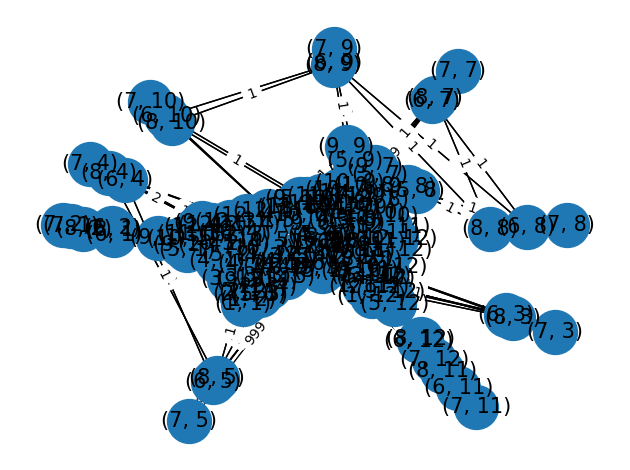

{(1, 1): {(1, 2): 2, (2, 1): 2}, (1, 2): {(1, 1): 2, (1, 3): 2, (2, 2): 2}, (2, 1): {(1, 1): 2, (2, 2): 2, (3, 1): 1}, (1, 3): {(1, 2): 2, (1, 4): 2, (2, 3): 2}, (2, 2): {(1, 2): 2, (2, 1): 2, (2, 3): 2, (3, 2): 1}, (1, 4): {(1, 3): 2, (1, 5): 1, (2, 4): 2}, (2, 3): {(1, 3): 2, (2, 2): 2, (2, 4): 2, (3, 3): 1}, (1, 5): {(1, 4): 1, (1, 6): 1, (2, 5): 1}, (2, 4): {(1, 4): 2, (2, 3): 2, (2, 5): 1, (3, 4): 1}, (1, 6): {(1, 5): 1, (1, 7): 2, (2, 6): 2}, (2, 5): {(1, 5): 1, (2, 4): 1, (2, 6): 1, (3, 5): 1}, (1, 7): {(1, 6): 2, (1, 8): 2, (2, 7): 2}, (2, 6): {(1, 6): 2, (2, 5): 1, (2, 7): 2, (3, 6): 1}, (1, 8): {(1, 7): 2, (1, 9): 2, (2, 8): 2}, (2, 7): {(1, 7): 2, (2, 6): 2, (2, 8): 2, (3, 7): 1}, (1, 9): {(1, 8): 2, (1, 10): 1, (2, 9): 2}, (2, 8): {(1, 8): 2, (2, 7): 2, (2, 9): 2, (3, 8): 1}, (1, 10): {(1, 9): 1, (1, 11): 1, (2, 10): 1}, (2, 9): {(1, 9): 2, (2, 8): 2, (2, 10): 1, (3, 9): 1}, (1, 11): {(1, 10): 1, (1, 12): 1, (2, 11): 1}, (2, 10): {(1, 10): 1, (2, 9): 1, (2, 11): 1, (3, 10):

In [ ]:
sm = createMall()
sm.plotWeightedGraph()

sm.printGraph()

print(sm.all_nodes)
astar = AStarSearch(sm)
pp = pprint.PrettyPrinter(indent=4)

# 3.1 [start:K2, 1st_store:B9, 2nd_store:D9, end:K1]
# 3.2 [start:K1, 1st_store:H1, 2nd_store:H1, end:L2] (1st store is the same as 2nd store)
# 3.3 [start:L2, 1st_store:J5, 2nd_store:H10, end:K2]
# 3.4 [start:L1, 1st_store:I1, 2nd_store:H5, end:K1]
# 3.5 [start:K2, 1st_store:D9, 2nd_store:A4, end:L1]


astar.printAllHeuristics((10,8))
astar.aStarSearch((2,11),(9,2))
astar.aStarSearch((9,2),(9,4))


test = list(map(strToNode, ["K2", "B9",  "D9", "K1"]))
astar.aStarMultiSearch(test)
test = list(map(strToNode, ["K1", "H1",  "H1", "L2"]))
astar.aStarMultiSearch(test)
test = list(map(strToNode, ["L2", "J5", "H10", "K2"]))
astar.aStarMultiSearch(test)
test = list(map(strToNode, ["L1", "I1",  "H5", "K1"]))
astar.aStarMultiSearch(test)
test = list(map(strToNode, ["K2", "D9",  "A4", "L1"]))
astar.aStarMultiSearch(test)





